In [ ]:
!pip install tensorflow

In [ ]:
# Create various tensors
import tensorflow as tf
import numpy as np
scalar = tf.constant(5, dtype=tf.int32)
vector = tf.constant([1, 2, 3], dtype=tf.float32)
matrix = tf.constant([[1, 2], [3, 4]], dtype=tf.float64)
tensor = tf.constant(np.random.rand(3, 3, 3), dtype=tf.float32)

In [ ]:
import tensorflow as tf
x = tf.constant(5)
print(x)

tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
#declaring tensor arrays
import tensorflow as tf
x = tf.constant([1,2,3,4,5])
print(x)

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


In [ ]:
#constants in tensors 2 d
import tensorflow as tf
x = tf.constant([[1,2,3],[4,5,6]])
print(x)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [ ]:
#converting tensors into numpy
import tensorflow as tf
x = tf.constant([[1,2,3],[4,5,6]])
print(x.numpy())

[[1 2 3]
 [4 5 6]]


In [ ]:
#using tf ones and zeros
print(tf.zeros(shape=[2,3]))
print(tf.ones(shape=[2,3]))

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [ ]:
initial_value = tf.random.normal(shape=(2, 2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.96839774,  0.9307927 ],
       [-1.8184761 , -0.7733715 ]], dtype=float32)>


In [ ]:
#changing the tensor variables
new_value = tf.random.normal(shape=(2, 2))
a.assign(new_value)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j]
a

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.4436731 , -1.143766  ],
       [ 0.12977238, -1.2377614 ]], dtype=float32)>

In [ ]:
#math in tensors
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))
print(tf.add(a, b))
print(tf.multiply(a, b))

c = a + b
d = tf.square(c)
e = tf.exp(d)
print(c)
print(d)
print(e)

tf.Tensor(
[[-0.03444406 -0.06211057]
 [-0.36846972 -1.3876646 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.14248577 -0.14890918]
 [-0.34627303 -1.927724  ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.03444406 -0.06211057]
 [-0.36846972 -1.3876646 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.1863936e-03 3.8577232e-03]
 [1.3576993e-01 1.9256129e+00]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.0011871 1.0038651]
 [1.1454183 6.8593516]], shape=(2, 2), dtype=float32)


In [ ]:
#computing gradients with gradient tape
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
  tape.watch(a)
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

a = tf.Variable(a)

with tf.GradientTape() as tape:
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[ 0.01860873 -0.567949  ]
 [ 0.5756695   0.97868234]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.01860873 -0.567949  ]
 [ 0.5756695   0.97868234]], shape=(2, 2), dtype=float32)


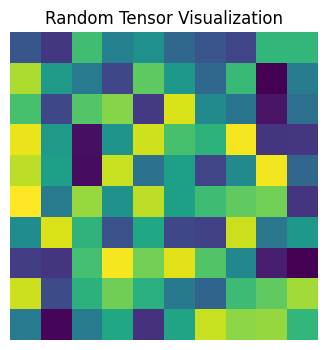

In [ ]:
# Visualizing tensors
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(4, 4))
plt.imshow(np.random.rand(10, 10), cmap='viridis')
plt.title("Random Tensor Visualization")
plt.axis('off')
plt.show()

In [ ]:
# Einsum operations
A = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
B = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)
einsum_sum = tf.einsum('ij->', A)
einsum_elementwise = tf.einsum('ij,ij->ij', A, B)
einsum_outer = tf.einsum('i,j->ij', vector, vector)

print("Einsum Summation:", einsum_sum.numpy())
print("Einsum Element-wise Multiplication:\n", einsum_elementwise.numpy())
print("Einsum Outer Product:\n", einsum_outer.numpy())

Einsum Summation: 10.0
Einsum Element-wise Multiplication:
 [[ 5. 12.]
 [21. 32.]]
Einsum Outer Product:
 [[1. 2. 3.]
 [2. 4. 6.]
 [3. 6. 9.]]


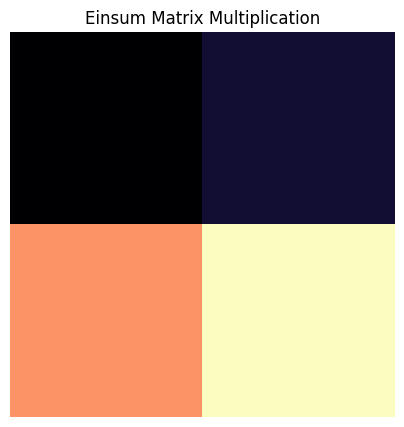

In [ ]:
# Einsum visualization
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])
einsum_matrix_multiplication = np.einsum('ij,jk->ik', x, y)
plt.figure(figsize=(5, 5))
plt.imshow(einsum_matrix_multiplication, cmap='magma')
plt.title("Einsum Matrix Multiplication")
plt.axis('off')
plt.show()

In [ ]:
# Advanced operations
reshaped_tensor = tf.reshape(tensor, [9, 3])
sliced_tensor = tensor[:, :2, :]
concatenated_tensor = tf.concat([matrix, matrix], axis=0)
stacked_tensor = tf.stack([matrix, matrix], axis=0)

eye_matrix = tf.eye(3)
diag_matrix = tf.linalg.diag([1, 2, 3])
trace_val = tf.linalg.trace(matrix)

tensor_norm = tf.norm(matrix)
rank_tensor = tf.rank(matrix)

eigenvalues, eigenvectors = tf.linalg.eigh(tf.constant([[6., 2.], [2., 3.]]))

print("Reshaped Tensor Shape:", reshaped_tensor.shape)
print("Sliced Tensor Shape:", sliced_tensor.shape)
print("Concatenated Tensor Shape:", concatenated_tensor.shape)
print("Stacked Tensor Shape:", stacked_tensor.shape)
print("Identity Matrix:\n", eye_matrix.numpy())
print("Diagonal Matrix:\n", diag_matrix.numpy())
print("Trace of Matrix:", trace_val.numpy())
print("Tensor Norm:", tensor_norm.numpy())
print("Tensor Rank:", rank_tensor.numpy())
print("Eigenvalues:", eigenvalues.numpy())
print("Eigenvectors:\n", eigenvectors.numpy())

Reshaped Tensor Shape: (9, 3)
Sliced Tensor Shape: (3, 2, 3)
Concatenated Tensor Shape: (4, 2)
Stacked Tensor Shape: (2, 2, 2)
Identity Matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Diagonal Matrix:
 [[1 0 0]
 [0 2 0]
 [0 0 3]]
Trace of Matrix: 5.0
Tensor Norm: 5.477225575051661
Tensor Rank: 2
Eigenvalues: [1.9999999 7.       ]
Eigenvectors:
 [[-0.4472136  0.8944272]
 [ 0.8944272  0.4472136]]


In [ ]:
# Broadcasting example
a = tf.constant([1, 2, 3])
b = tf.constant([[1], [2], [3]])
broadcast_result = a + b
print("Broadcasting Result:\n", broadcast_result.numpy())

Broadcasting Result:
 [[2 3 4]
 [3 4 5]
 [4 5 6]]


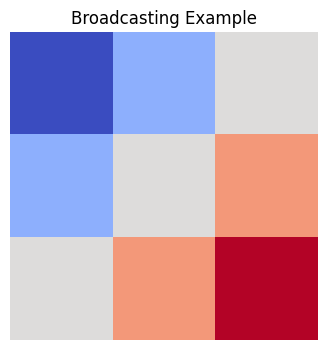

In [ ]:
plt.figure(figsize=(4, 4))
plt.imshow(broadcast_result.numpy(), cmap='coolwarm')
plt.title("Broadcasting Example")
plt.axis('off')
plt.show()

In [ ]:
# Gradient computation
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = x ** 2 + 3 * x + 5

gradient = tape.gradient(y, x)
print("Gradient dy/dx:", gradient.numpy())

Gradient dy/dx: 9.0
